# Extract $r=D^-/D^+$ from SIDIS cross-section ratio of $(e,e'\pi^+)/(e,e'\pi^+)$ 

with and without acceptance corrections
last edit Sep-18, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

Welcome to JupyROOT 6.26/04


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:62: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  weight_per_run_rga[run] = 1./float(beam_charge_all_runs_rga[beam_charge_all_runs_rga.runnum==run].beam_charge);


Loaded bin migration and acceptance weights from MC calculations.


In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [3]:
results_path = '/Users/erezcohen/Desktop/data/BAND/Results/' + 'Results_10June2023/'
figures_path = '/Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/'

# Auxiliary functions

# (1) Convert cross-section ratio to $r=D^-/D^+$ and plot it

In [4]:
z_arr,z_errdw_arr,z_errup_arr, r_arr, r_errup_arr, r_errdw_arr = dict(),dict(),dict(),dict(),dict(),dict()

In [5]:
xlim = (0.27,0.94)
ylim = (0.02,1)#

## (1.1) The impact of the acceptance corrections on the results
without = only beam charge weighting

with = beam charge, bin migration, and acceptance corrections

In [6]:
xB_selected = 0.32
Delta_xB    = 0.02
prefix      = 'Untagged_SIDIS_ratio_'
data_path   = results_path + 'Q2_bins_with_partial_corrections/'
suffixes    = []
for Q2_min in [2,3,4]:
    Q2_max = Q2_min + 0.5
    for suffix_str,weight_option in zip(['meson_subtraction','bin_migration','acceptance','bin_migration_acceptance','bin_migration_acceptance_meson_subtraction'],                                   
                                        ['meson subtraction','bin migration','acceptance','bin migration + acceptance','bin migration + acceptance + meson subtraction']):
        suffix   = suffix_str +'_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
        suffixes.append(suffix)
    
print(suffixes);
r_Results = extract_r_from_SIDIS_ratio(data_path = data_path,
                                       prefix      = prefix,
                                       suffixes    = suffixes,
                                       xB_selected = xB_selected, 
                                       Delta_xB    = Delta_xB,
                                       fdebug      = 0 )
[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results;

['meson_subtraction_2.0_Q2_2.5', 'bin_migration_2.0_Q2_2.5', 'acceptance_2.0_Q2_2.5', 'bin_migration_acceptance_2.0_Q2_2.5', 'bin_migration_acceptance_meson_subtraction_2.0_Q2_2.5', 'meson_subtraction_3.0_Q2_3.5', 'bin_migration_3.0_Q2_3.5', 'acceptance_3.0_Q2_3.5', 'bin_migration_acceptance_3.0_Q2_3.5', 'bin_migration_acceptance_meson_subtraction_3.0_Q2_3.5', 'meson_subtraction_4.0_Q2_4.5', 'bin_migration_4.0_Q2_4.5', 'acceptance_4.0_Q2_4.5', 'bin_migration_acceptance_4.0_Q2_4.5', 'bin_migration_acceptance_meson_subtraction_4.0_Q2_4.5']


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:482: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  R,dR_up,dR_dw = float(res['$R$']),float(res['$\Delta R_{+}$']),float(res['$\Delta R_{+}$'])
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:483: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  R_corrected,dR_corrected_up,dR_corrected_dw = float(res['$R^{corrected}$']),float(res['$\Delta R^{corrected}_{+}$']),float(res['$\Delta R^{corrected}_{+}$'])
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:482: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeErr

Done loading Untagged_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/Results_10June2023/Q2_bins_with_partial_corrections/
For ['meson_subtraction_2.0_Q2_2.5', 'bin_migration_2.0_Q2_2.5', 'acceptance_2.0_Q2_2.5', 'bin_migration_acceptance_2.0_Q2_2.5', 'bin_migration_acceptance_meson_subtraction_2.0_Q2_2.5', 'meson_subtraction_3.0_Q2_3.5', 'bin_migration_3.0_Q2_3.5', 'acceptance_3.0_Q2_3.5', 'bin_migration_acceptance_3.0_Q2_3.5', 'bin_migration_acceptance_meson_subtraction_3.0_Q2_3.5', 'meson_subtraction_4.0_Q2_4.5', 'bin_migration_4.0_Q2_4.5', 'acceptance_4.0_Q2_4.5', 'bin_migration_acceptance_4.0_Q2_4.5', 'bin_migration_acceptance_meson_subtraction_4.0_Q2_4.5']


saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/r_vs_z_x_0.32pm0.02_2.0_Q2_2.5_allW_WithAndWithoutAcceptanceCorrections.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/r_vs_z_x_0.32pm0.02_3.0_Q2_3.5_allW_WithAndWithoutAcceptanceCorrections.pdf
saved /Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/Results_rSIDIS/r_vs_z_x_0.32pm0.02_4.0_Q2_4.5_allW_WithAndWithoutAcceptanceCorrections.pdf


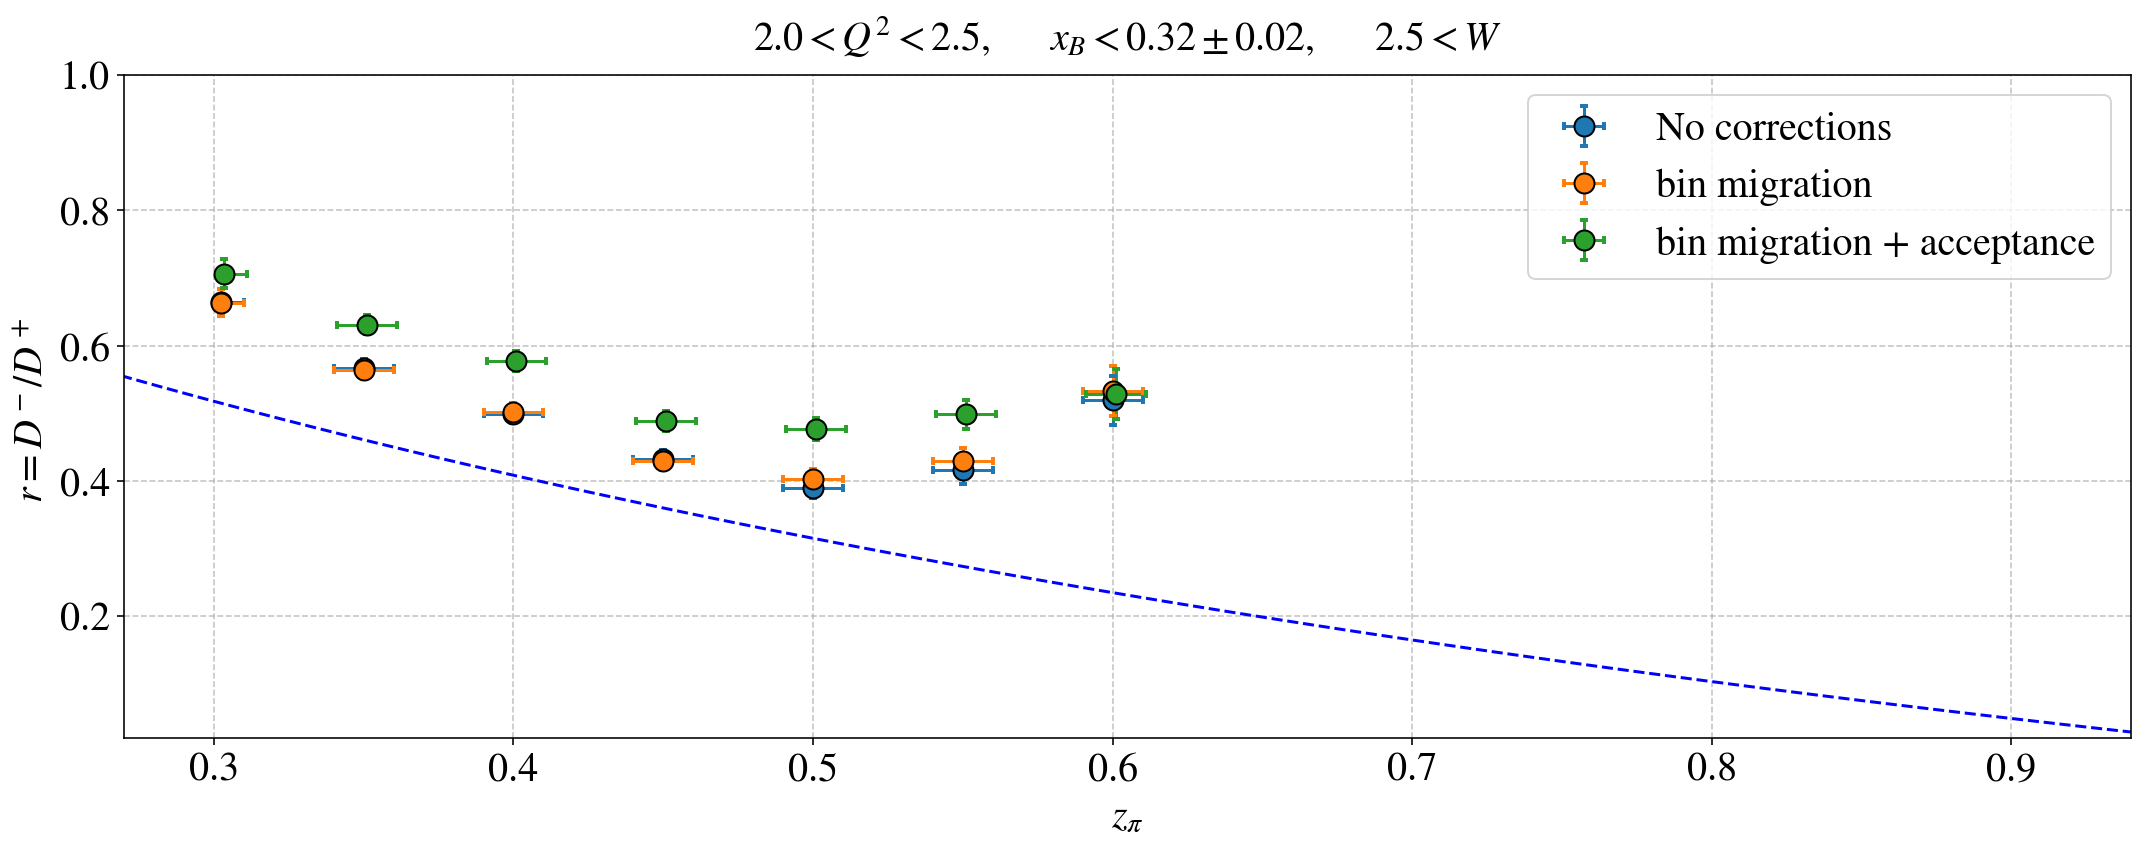

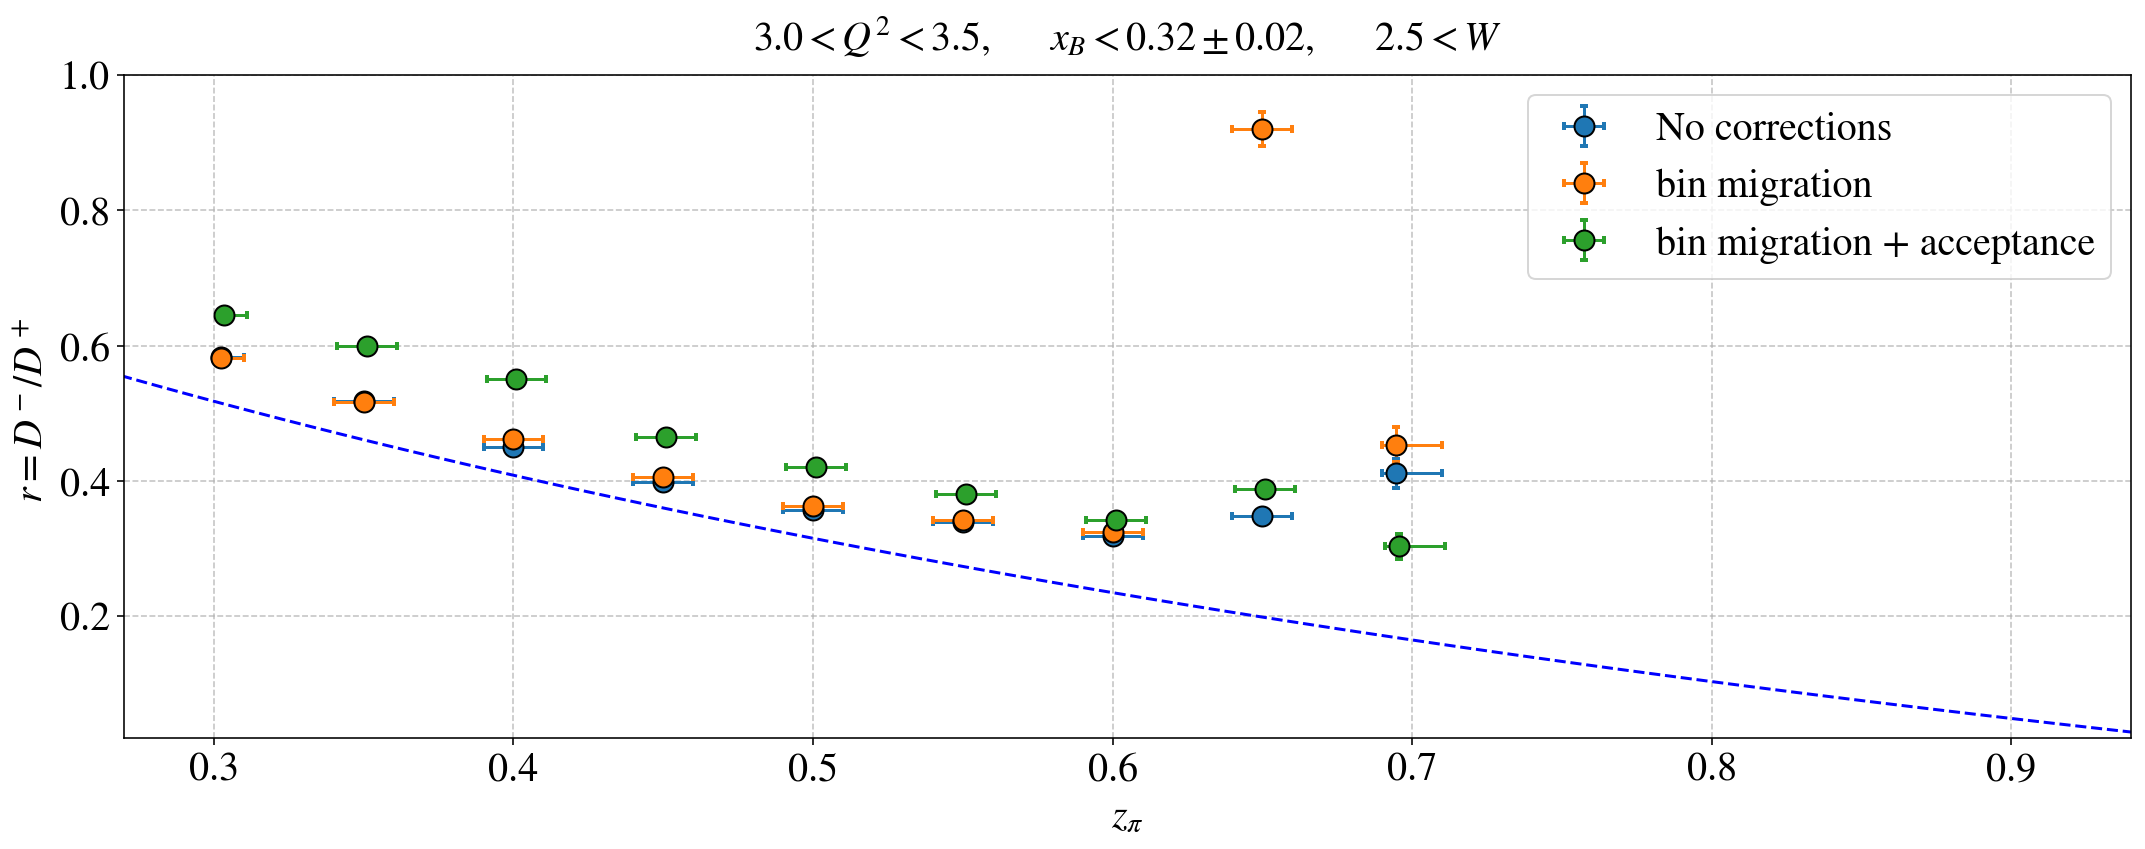

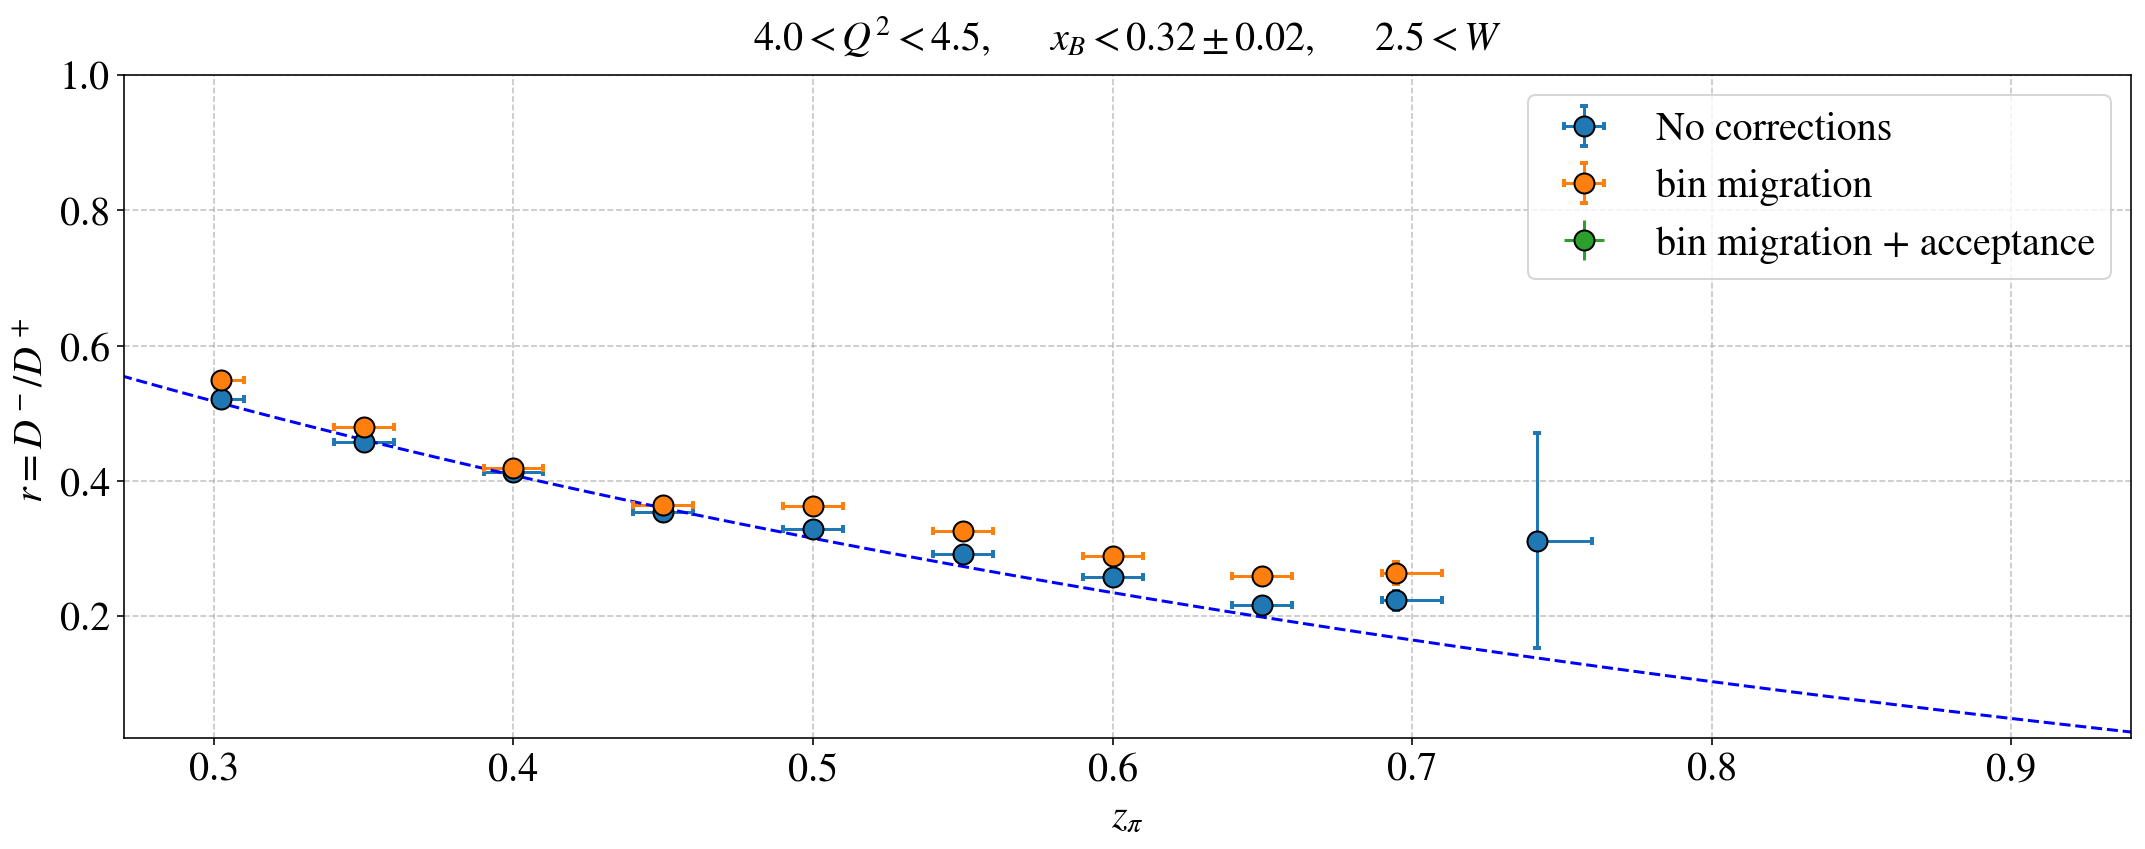

In [7]:
do_add_legend = True;

for Q2_min in [2,3,4]:
    Q2_max = Q2_min + 0.5
    fig = plt.figure(figsize=(15,6), tight_layout=True);  ax = fig.add_subplot(1,1,1)
    try:
        suffix   = 'bin_migration_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
        plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                               z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                               r     = r_arr[suffix],
                               r_err = (r_errdw_arr[suffix] + r_errup_arr[suffix])/2,
                               label = 'No corrections', 
                               ax    = ax, 
                               do_add_fit_to_label=False);
    except: print('no data for',suffix)
    plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')
    for suffix_str,weight_option,suffix_idx in zip(['bin_migration','bin_migration_acceptance','bin_migration_acceptance_meson_subtraction'], 
                                                   ['bin migration','bin migration + acceptance','bin migration + acceptance + meson subtraction'],
                                                   [0,1]):#,2,3
        
        suffix   = suffix_str +'_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
        try: plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix]+0.001*np.random.uniform(1)*suffix_idx, z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                        r     = r_corrected_arr[suffix], r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                                        label = weight_option,  ax    = ax, 
                                        do_add_fit_to_label=False);
        except: print('no data for',suffix)        
    set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ", 
             title='$%.1f<Q^2<%.1f$,      $x_B<%.2f\pm%.2f$,      $2.5 < W$'%(Q2_min,Q2_max,xB_selected, Delta_xB),
             do_add_grid=True, do_add_legend=do_add_legend, 
             xlim=xlim, ylim=ylim, fontsize=20);
    # if do_add_legend:
    #     ax.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18)
    save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW_WithAndWithoutAcceptanceCorrections'%(xB_selected, Delta_xB, Q2_min, Q2_max) + '.pdf' )